# Batch experiment runner example (`run_experiment`)

This notebook shows how to run the end-to-end pipeline for **multiple YAML configs** in `config/`
(excluding configs starting with `base*`) and write results to a new output folder.

Notes:
- Running *all* configs can take a while. Use `config_glob` to restrict the set during development (e.g. `"fgsm_*.yaml"` or `"pgd_*.yaml"`).
- Outputs are written under `outputs/` by default (see `run_dir` printed below).


In [1]:
from pathlib import Path
import sys
from pathlib import Path
import csv
import json

# Make `import src.*` work when running from nested directory
REPO_ROOT = Path.cwd().resolve()
if not (REPO_ROOT / "src").exists() and (REPO_ROOT.parent / "src").exists():
    REPO_ROOT = REPO_ROOT.parent.resolve()

if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))

from src.api import run_experiment


Epoch [10/20] Train Loss: 0.1165, Train Acc: 95.83%, Val Loss: 0.1320, Val Acc: 94.00%
Epoch [20/20] Train Loss: 0.0267, Train Acc: 99.17%, Val Loss: 0.0324, Val Acc: 99.00%
Epoch [10/20] Train Loss: 0.1165, Train Acc: 95.83%, Val Loss: 0.1320, Val Acc: 94.00%
Epoch [20/20] Train Loss: 0.0267, Train Acc: 99.17%, Val Loss: 0.0324, Val Acc: 99.00%
Epoch [10/20] Train Loss: 0.1165, Train Acc: 95.83%, Val Loss: 0.1320, Val Acc: 94.00%
Epoch [20/20] Train Loss: 0.0267, Train Acc: 99.17%, Val Loss: 0.0324, Val Acc: 99.00%
Epoch [10/20] Train Loss: 0.1165, Train Acc: 95.83%, Val Loss: 0.1320, Val Acc: 94.00%
Epoch [20/20] Train Loss: 0.0267, Train Acc: 99.17%, Val Loss: 0.0324, Val Acc: 99.00%
Epoch [10/20] Train Loss: 0.1165, Train Acc: 95.83%, Val Loss: 0.1320, Val Acc: 94.00%
Epoch [20/20] Train Loss: 0.0267, Train Acc: 99.17%, Val Loss: 0.0324, Val Acc: 99.00%
Epoch [10/20] Train Loss: 0.1165, Train Acc: 95.83%, Val Loss: 0.1320, Val Acc: 94.00%
Epoch [20/20] Train Loss: 0.0267, Train Acc

/Users/svenhockers/Documents/code_files/topology-and-robustness-in-DNNs/src/visualization.py:193: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


Epoch [10/20] Train Loss: 0.1165, Train Acc: 95.83%, Val Loss: 0.1320, Val Acc: 94.00%
Epoch [20/20] Train Loss: 0.0267, Train Acc: 99.17%, Val Loss: 0.0324, Val Acc: 99.00%
Epoch [10/20] Train Loss: 0.1165, Train Acc: 95.83%, Val Loss: 0.1320, Val Acc: 94.00%
Epoch [20/20] Train Loss: 0.0267, Train Acc: 99.17%, Val Loss: 0.0324, Val Acc: 99.00%
Epoch [10/20] Train Loss: 0.1165, Train Acc: 95.83%, Val Loss: 0.1320, Val Acc: 94.00%
Epoch [20/20] Train Loss: 0.0267, Train Acc: 99.17%, Val Loss: 0.0324, Val Acc: 99.00%
Epoch [10/20] Train Loss: 0.1165, Train Acc: 95.83%, Val Loss: 0.1320, Val Acc: 94.00%
Epoch [20/20] Train Loss: 0.0267, Train Acc: 99.17%, Val Loss: 0.0324, Val Acc: 99.00%
Epoch [10/20] Train Loss: 0.1165, Train Acc: 95.83%, Val Loss: 0.1320, Val Acc: 94.00%
Epoch [20/20] Train Loss: 0.0267, Train Acc: 99.17%, Val Loss: 0.0324, Val Acc: 99.00%
Wrote outputs to: /Users/svenhockers/Documents/code_files/topology-and-robustness-in-DNNs/outputs/run_20260109_100734


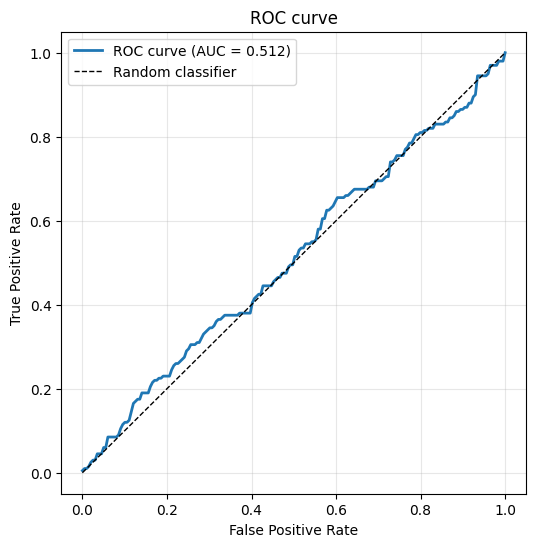

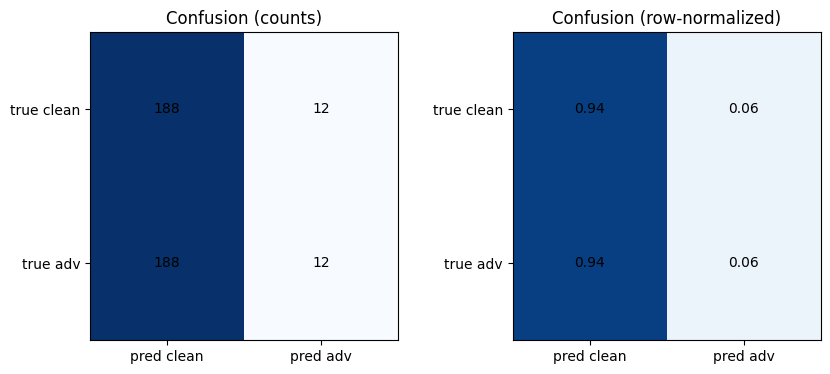

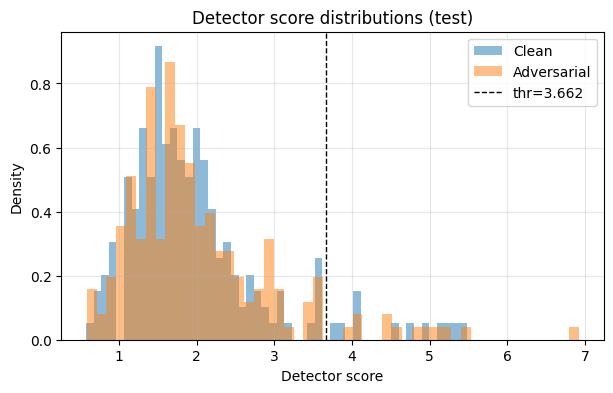

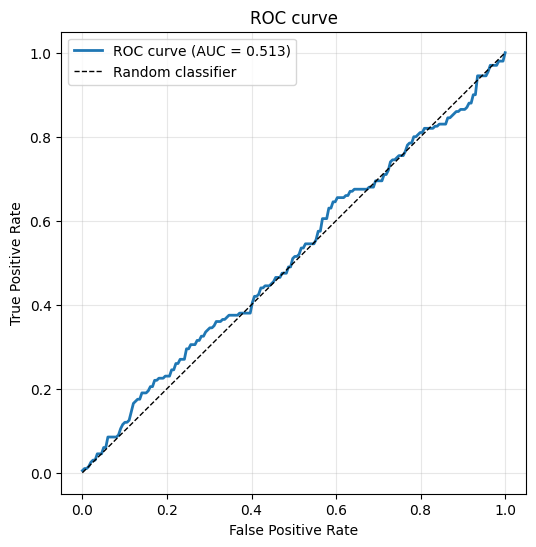

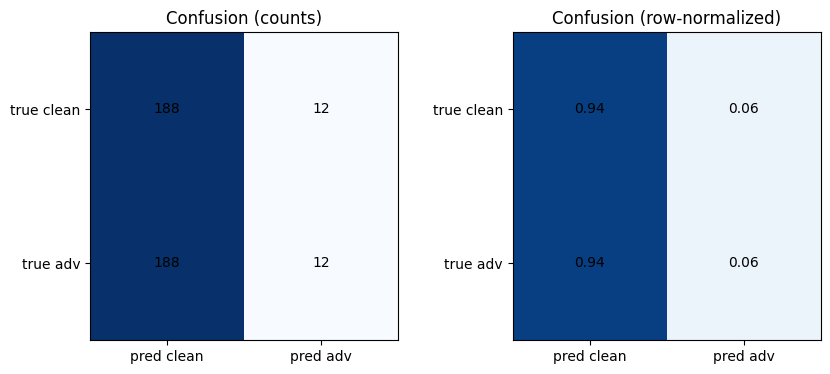

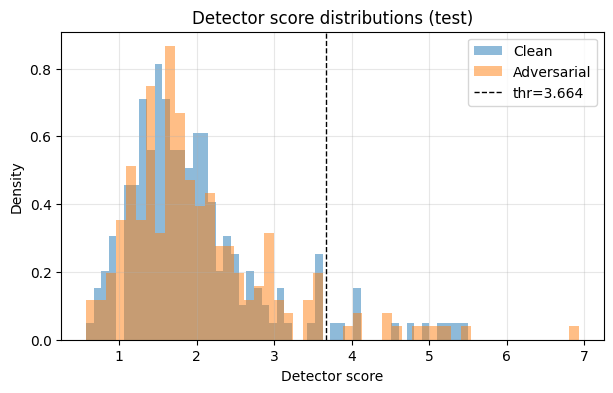

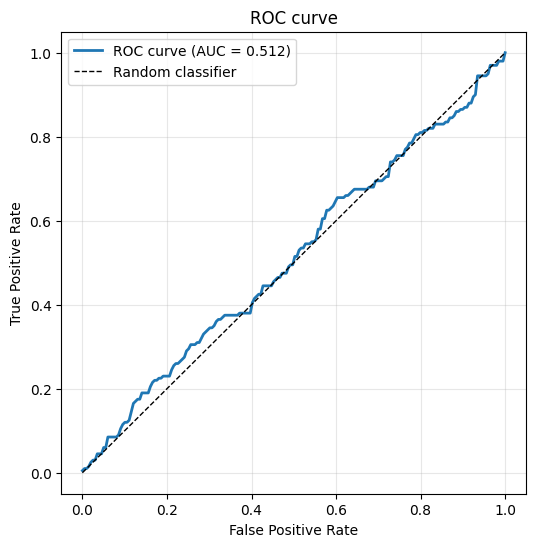

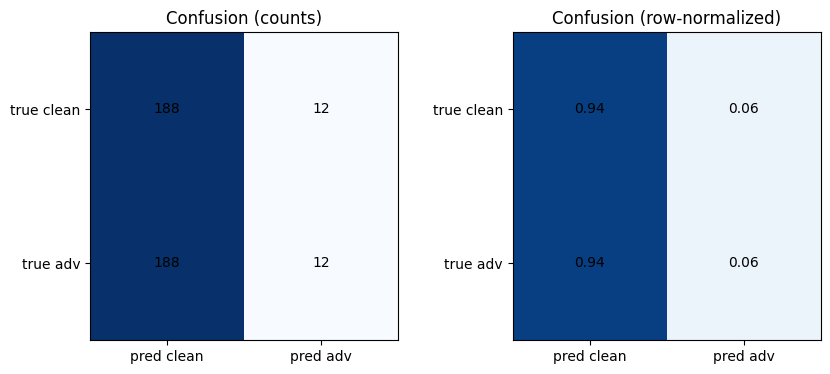

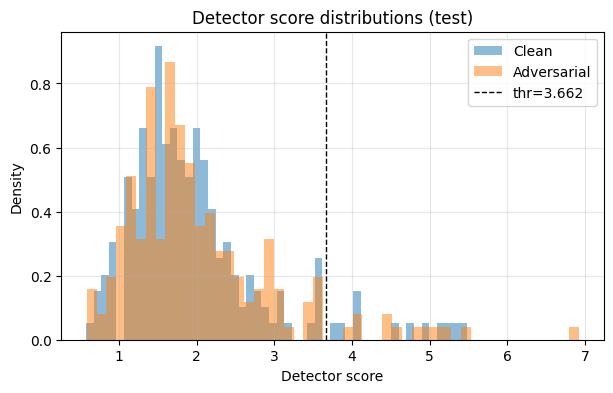

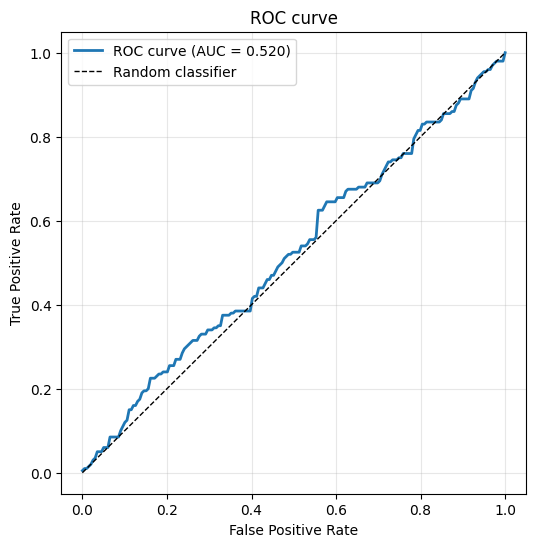

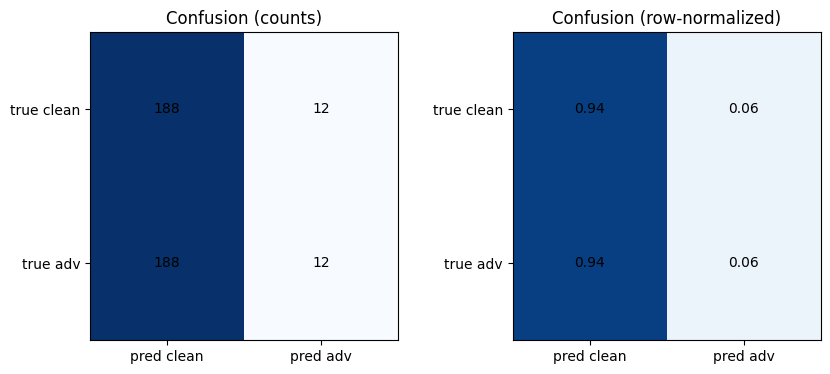

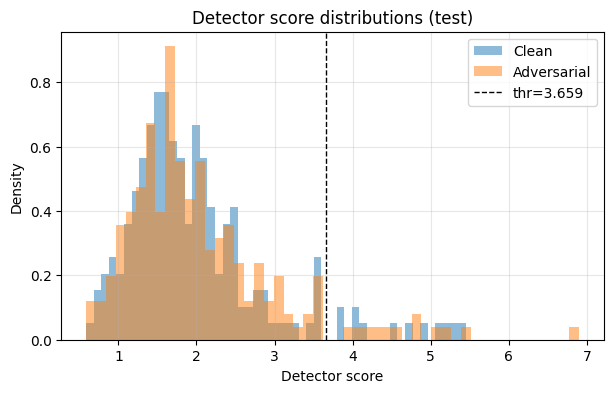

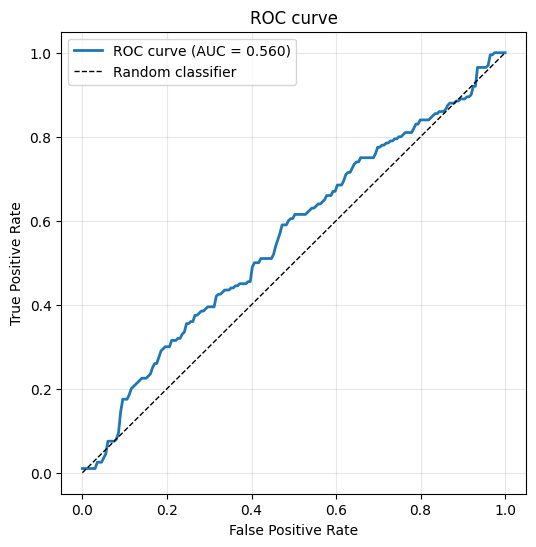

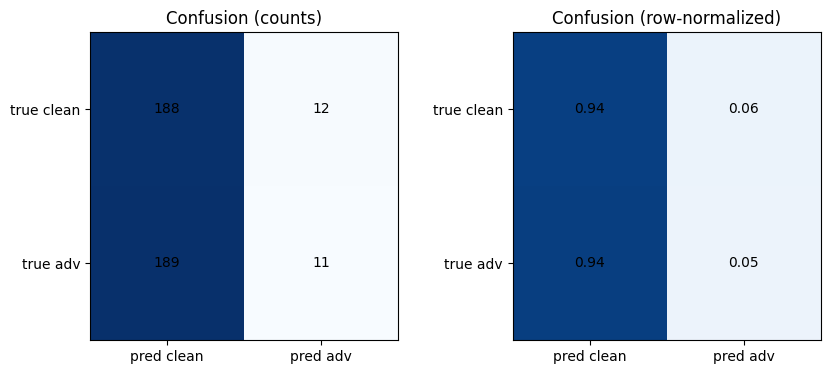

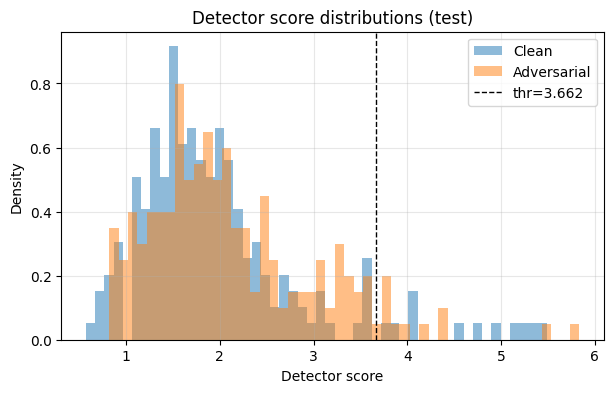

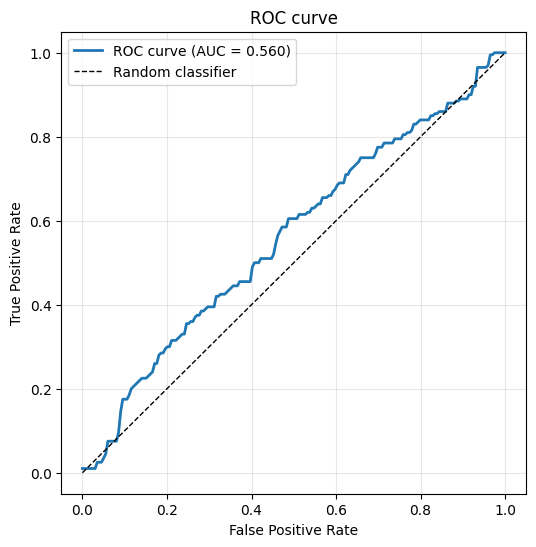

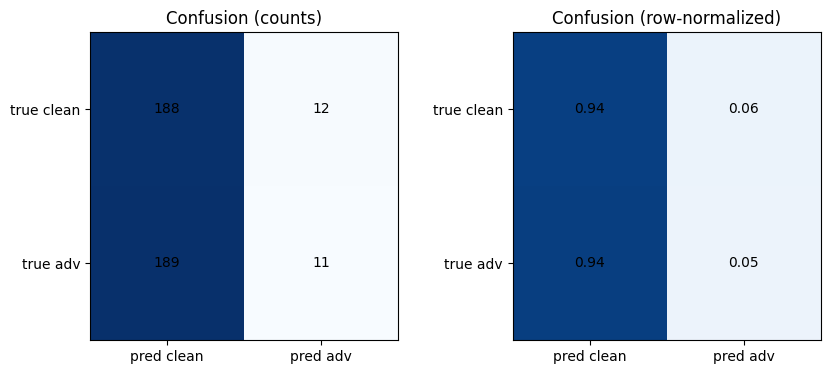

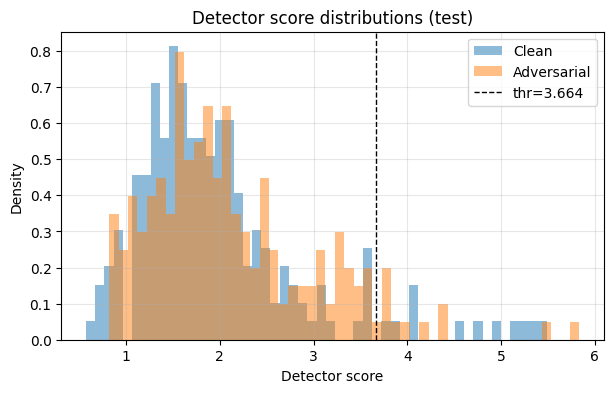

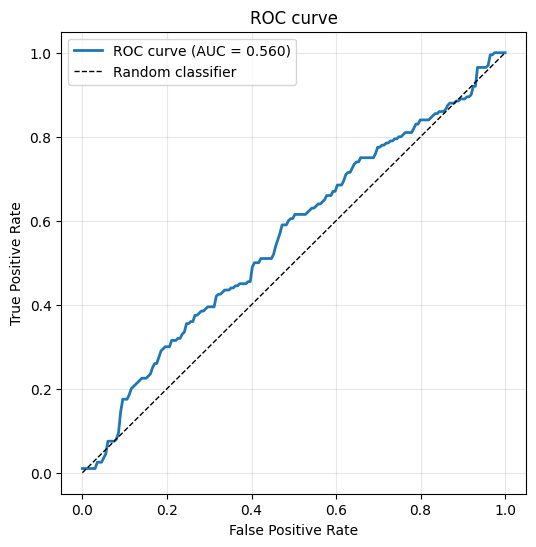

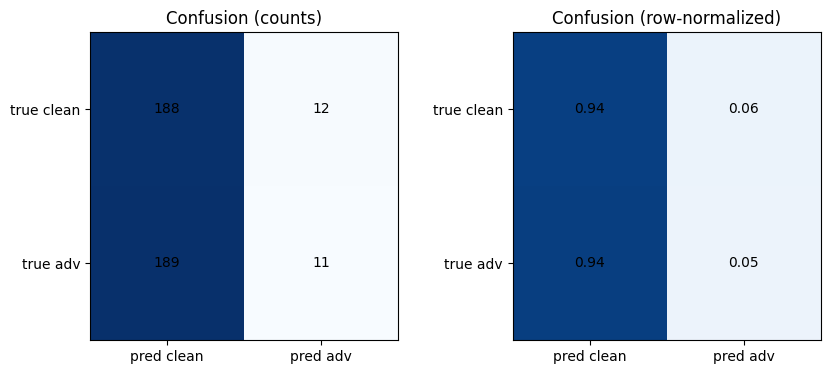

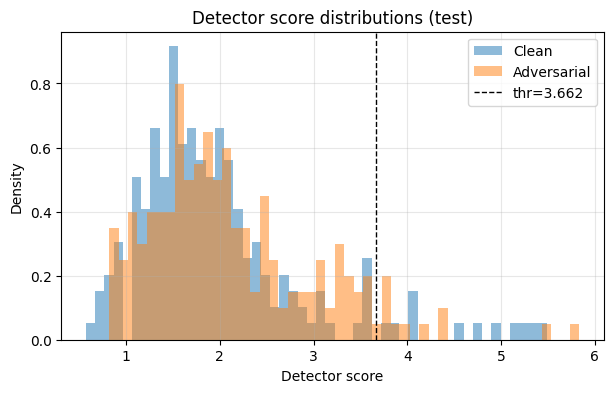

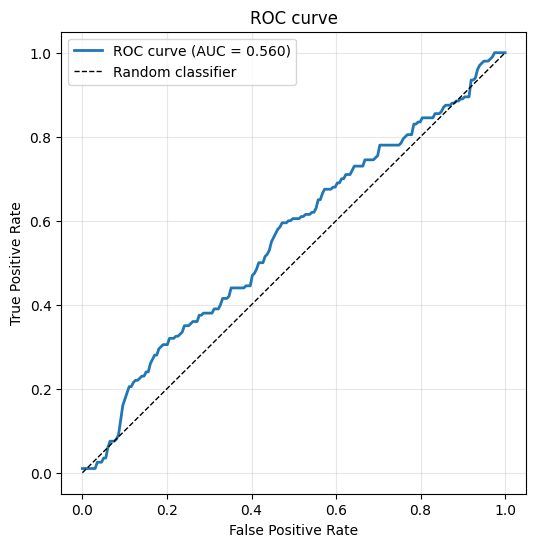

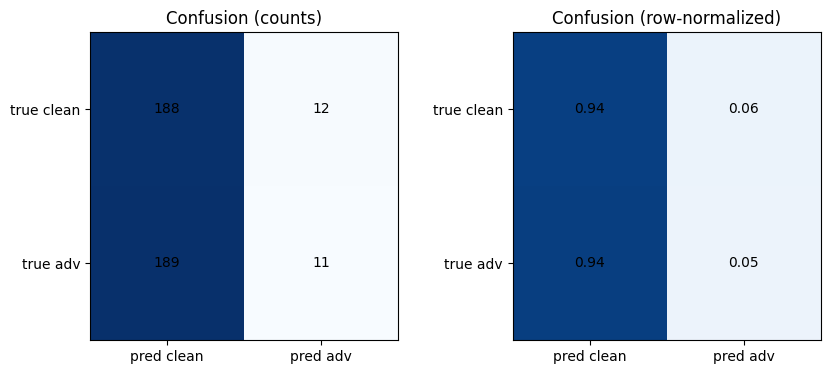

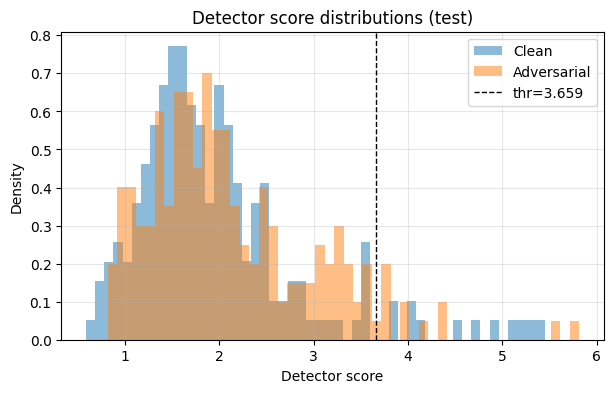

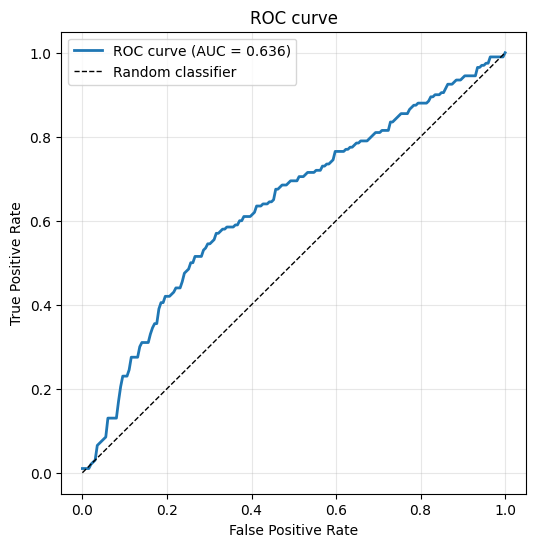

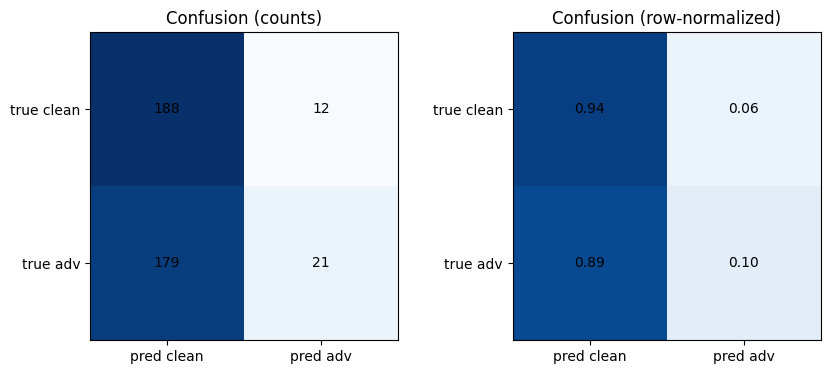

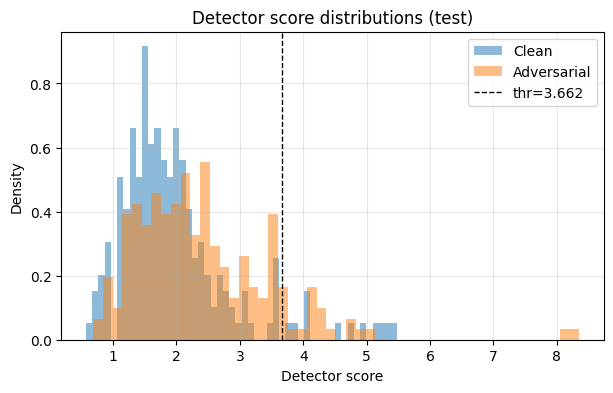

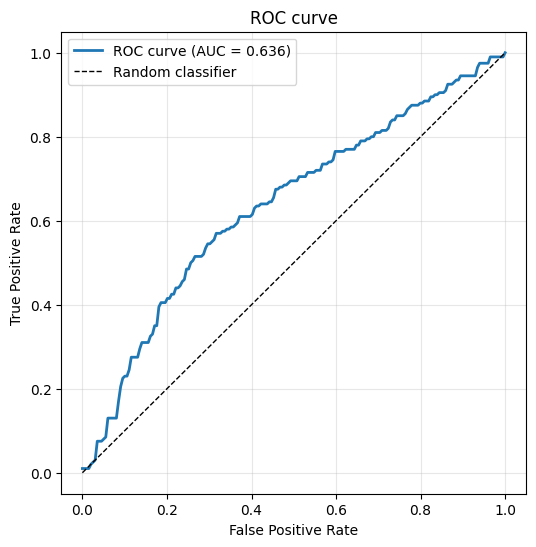

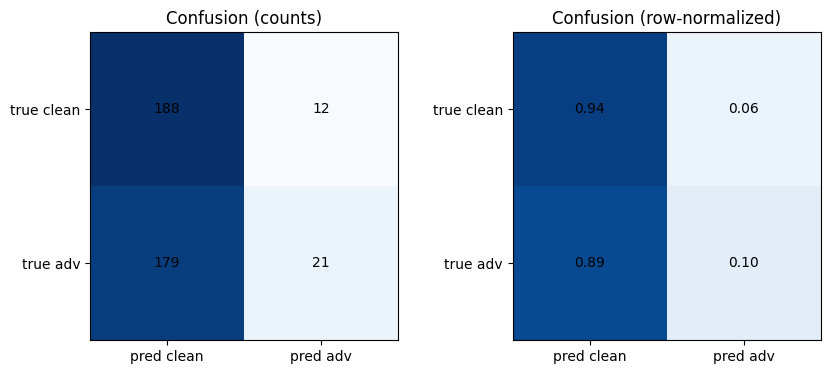

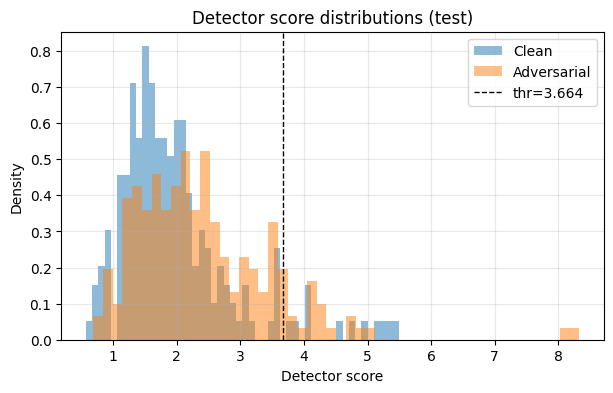

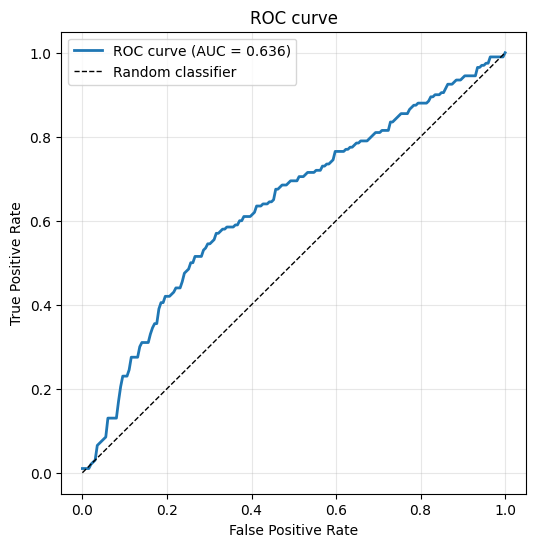

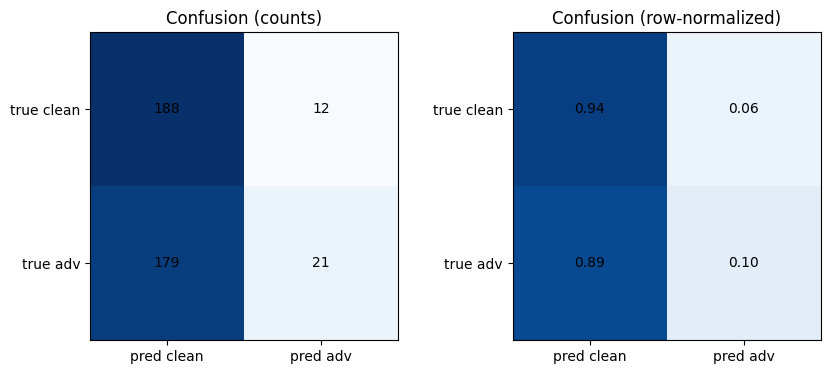

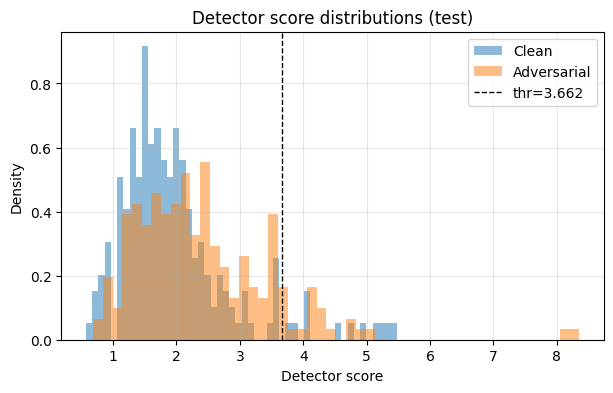

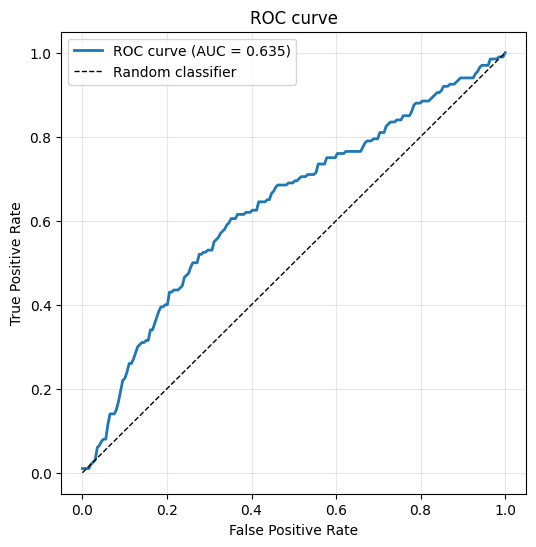

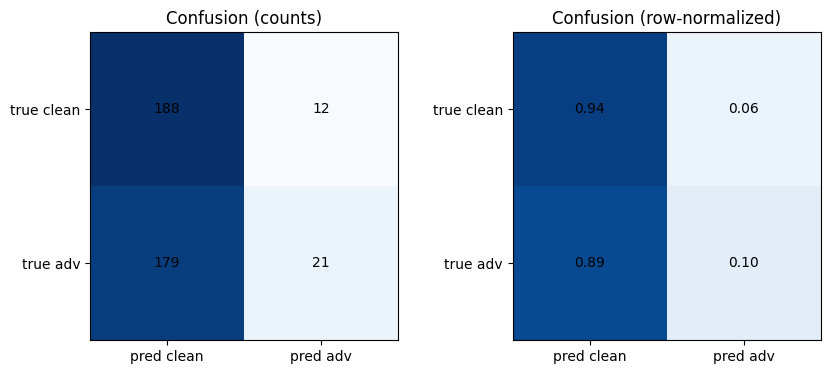

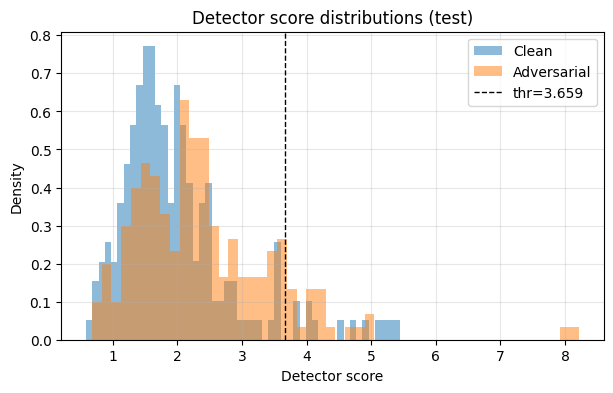

In [2]:
# Run a batch over configs in ./config (excluding base*.yaml).
# Tip: start with a smaller subset to iterate quickly.

out = run_experiment(
    dataset_name="two_moons",
    model_name="two_moons_mlp",
    config_glob="fgsm_*.yaml",  # change to "*.yaml" to run all non-base configs
    eval_only_successful_attacks=True,
)

run_dir = Path(out["run_dir"]) 
print("Wrote outputs to:", run_dir)


In [3]:
# Load the aggregated summaries.

summary_json = json.loads((run_dir / "summary.json").read_text(encoding="utf-8"))
print("num configs:", len(summary_json["results"]))
print("first config:", summary_json["results"][0]["config_name"] if summary_json["results"] else None)

print("\nTop rows from summary.csv:")
with (run_dir / "summary.csv").open("r", encoding="utf-8", newline="") as f:
    r = csv.DictReader(f)
    for i, row in enumerate(r):
        print(row)
        if i >= 4:
            break


num configs: 12
first config: fgsm_eps0p02_nopca

Top rows from summary.csv:
{'config_name': 'fgsm_eps0p02_nopca', 'roc_auc': '0.5125', 'pr_auc': '0.520695037945286', 'fpr_at_tpr95': '0.955', 'accuracy': '0.5', 'precision': '0.5', 'recall': '0.06', 'f1': '0.10714285714285712', 'threshold': '3.662043579010834'}
{'config_name': 'fgsm_eps0p02_pca10', 'roc_auc': '0.5126', 'pr_auc': '0.5206379651083267', 'fpr_at_tpr95': '0.955', 'accuracy': '0.5', 'precision': '0.5', 'recall': '0.06', 'f1': '0.10714285714285712', 'threshold': '3.664263209647949'}
{'config_name': 'fgsm_eps0p02_pca20', 'roc_auc': '0.5125', 'pr_auc': '0.520695037945286', 'fpr_at_tpr95': '0.955', 'accuracy': '0.5', 'precision': '0.5', 'recall': '0.06', 'f1': '0.10714285714285712', 'threshold': '3.6621279641372726'}
{'config_name': 'fgsm_eps0p02_pca5', 'roc_auc': '0.519975', 'pr_auc': '0.5246746693977313', 'fpr_at_tpr95': '0.94', 'accuracy': '0.5', 'precision': '0.5', 'recall': '0.06', 'f1': '0.10714285714285712', 'threshold': '